# Alibi Detect / Kolmogorov-Smirnov

See: https://docs.seldon.io/projects/alibi-detect/en/stable/methods/ksdrift.html

In [1]:
import pickle
import matplotlib.pyplot as plt

from detectors.AlibiKSDetector import AlibiKSDetector

# load data

In [2]:
# Robert
file = 'data/movies/embeddings/amazon_small_gradual_drift.pickle'

# EML4U Experiment server
file = '../../data/amazon/amazon_small_gradual_drift.pickle'

with open(file, 'rb') as handle:
    gradual_dict = pickle.load(handle)

# initiate detector

In [3]:
aks = AlibiKSDetector()
aks.fit(gradual_dict['orig'][0])

AlibiKSDetector()

# general tests

In [4]:
# Boolean values
if(True):
    p_s = []
    for percentage in gradual_dict['drifted'][0]:
        p_s.append(aks.predict(percentage))
    print(p_s)

# Float values
if(True):
    p_s = []
    for percentage in gradual_dict['drifted'][0]:
        p_s.append(aks.predict_proba(percentage))
    print(p_s)

# Tests parameter 'alternative'
#
# less
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#[0.4987054, 0.4982303, 0.49879575, 0.49862203, 0.49844822, 0.49860978, 0.4985071, 0.49870992, 0.49863553, 0.49857917, 0.49852252]
#
# greater
#[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#[0.51410437, 0.51441544, 0.51414794, 0.51432794, 0.51405597, 0.5141818, 0.51396865, 0.5141569, 0.51398176, 0.5140256, 0.51404124]
#
# no alternative
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#[0.5200144, 0.5191645, 0.51923823, 0.5192277, 0.519272, 0.51934284, 0.519196, 0.51936626, 0.5192465, 0.51937175, 0.51935405]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.5200144, 0.5191645, 0.51923823, 0.5192277, 0.519272, 0.51934284, 0.519196, 0.51936626, 0.5192465, 0.51937175, 0.51935405]


# plotting results

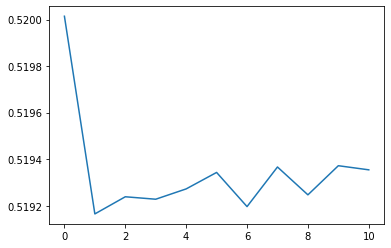

In [5]:
plt.plot(p_s)